In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

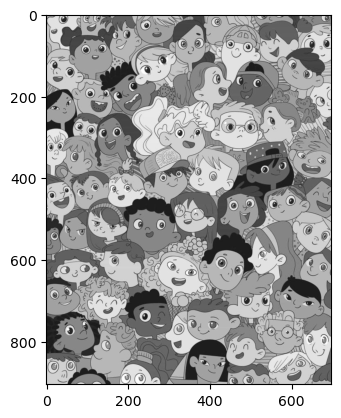

In [2]:
image = cv2.imread('1/1.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

In [3]:
object_list = [
    "1/ice_cream.jpg",
    "1/boat.png",
    "1/ballon.png",
    "1/car.png",
    "1/pony.png",
    "1/watermelon.png",
    "1/train.png",
    "1/cake.png",
    "1/duck.png",
    "1/grapes.png",
    "1/rabbit.png",
    "1/strawberry.png",
    "1/teddy_bear.png",
    "1/tennis_ball.png",
    "1/tie.png",
]

In [4]:
output_image = image.copy()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

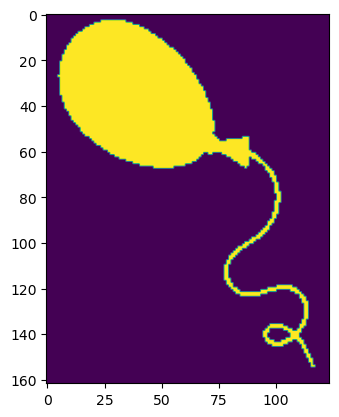

In [5]:
# mask background
def create_mask(template):
    gray_template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
    _, mask = cv2.threshold(gray_template, 200, 255, cv2.THRESH_BINARY_INV)
    plt.imshow(mask)
    return mask

create_mask(cv2.imread(object_list[2]))

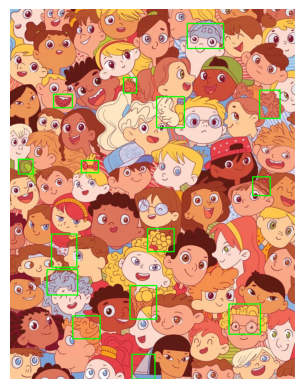

In [6]:
# Scale the size of template (from 50% -> 100%, step = 10)
# It would be better if we use SIFT feature matching but we have to use template matching in this case
scales = np.linspace(0.5, 1, 10)

for object_path in object_list:
    template = cv2.imread(object_path)


    mask = create_mask(template)

    # Init score to find max_val of each template
    max_val_global = -1
    best_match_loc = None
    best_scale = None
    best_w, best_h = None, None

    for scale in scales:
        resized_template = cv2.resize(template, (0, 0), fx=scale, fy=scale)
        resized_mask = cv2.resize(mask, (resized_template.shape[1], resized_template.shape[0]))

        w, h = resized_template.shape[1], resized_template.shape[0]

        result = cv2.matchTemplate(image, resized_template, cv2.TM_CCOEFF_NORMED, mask=resized_mask)

        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

        if max_val > max_val_global:
            max_val_global = max_val
            best_match_loc = max_loc
            best_scale = scale
            best_w, best_h = w, h

    if best_match_loc is not None:
        top_left = best_match_loc
        bottom_right = (top_left[0] + best_w, top_left[1] + best_h)
        cv2.rectangle(output_image, top_left, bottom_right, (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()